# Hidden Markov Model with `hmmlearn`
> [hmmlearn documentation](https://hmmlearn.readthedocs.io/en/latest/index.html)

### Import libraries

In [1]:
!pip3 install https://github.com/hmmlearn/hmmlearn/archive/refs/tags/0.3.0.tar.gz

Defaulting to user installation because normal site-packages is not writeable
  Using cached https://github.com/hmmlearn/hmmlearn/archive/refs/tags/0.3.0.tar.gz
  Preparing metadata (setup.py) ... done


In [2]:
from collections import defaultdict
import itertools
import pickle
import urllib

from hmmlearn.hmm import CategoricalHMM, GaussianHMM, PoissonHMM
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [3]:
# Ref https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
def plot_confusion_matrix(y_true, y_pred, target_names=None,
                          title='Confusion matrix', cmap=plt.get_cmap('Blues'),
                          normalize=False, figsize=(8,6)):
    '''
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    '''
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=target_names)

    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## 1. Dishonest Casino
### 1.1. Evaluation
Probability of given observation with given model

In [4]:
model = CategoricalHMM(n_components=2)  # [FAIR, LOADED]

# Num of observations
model.n_features = 6

# Model
# => Start probability, transition probability, emission probability
model.startprob_ = [1.0, 0.0]  # (n_components,)

model.transmat_ = [  # (n_components, n_components)
    [0.95, 0.05],
    [0.05, 0.95],
]
model.emissionprob_ = [  # n_components x n_features
    [ 1/6,  1/6,  1/6,  1/6,  1/6, 1/6],
    [1/10, 1/10, 1/10, 1/10, 1/10, 1/2],
]

In [5]:
# Observations
X = np.array([1,2,4,5,5,2,6,4,6,2,1,4,6,1,4,6,1,3,6,1,3,6,6,6,1,6,6,4,6,6,1,6,3,6,6,1,6,3,6,6,1,6,3,6,1]).reshape(-1,1) - 1

In [6]:
# Evaluation
model.score(X) # return log(probability)

-70.75927473215525

#### Exercise
Write your code in the cells below.
1. Change Observations
2. Evaluate the probability
3. Repeat 1~2 with different observations

In [7]:
# 1. Change Observations



# 2. Evaluate the probability



# 3. Repeat 1~2 with different observations




### 1.2. Decoding
Most likely sequence of states with given observations and model

In [8]:
model = CategoricalHMM(n_components=2, random_state=0)  # [FAIR, LOADED]

# Num of observations
model.n_features = 6

# Model
# => Start probability, transition probability, emission probability
model.startprob_ = [1.0, 0.0]  # (n_components,) => [FAIR, LOADED]

model.transmat_ = [  # (n_components, n_components)
    [0.95, 0.05],
    [0.05, 0.95],
]
model.emissionprob_ = [  # n_components x n_features
    [ 1/6,  1/6,  1/6,  1/6,  1/6, 1/6],
    [1/10, 1/10, 1/10, 1/10, 1/10, 1/2],
]

In [9]:
# Observations
X = np.array([1,2,4,5,5,2,6,4,6,2,1,4,6,1,4,6,1,3,6,1,3,6,6,6,1,6,6,4,6,6,1,6,3,6,6,1,6,3,6,6,1,6,3,6,1]).reshape(-1,1) - 1

In [10]:
# Decoding
model.decode(X)

(-73.56396112567273,
 array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1]))

#### Exercise
Write your code in the cells below.
1. Change Observations
2. Decode the observations
3. Repeat 1~2 with different observations

In [11]:
# 1. Change Observations



# 2. Decode the observations



# 3. Repeat 1~2 with different observations




### 1.3. Learning
Most likely model with given observations

In [12]:
model = CategoricalHMM(n_components=2, verbose=True, n_iter=20, random_state=0)

In [13]:
# Observations
X = np.array([1,2,4,5,5,2,6,4,6,2,1,4,6,1,4,6,1,3,6,1,3,6,6,6,1,6,6,4,6,6,1,6,3,6,6,1,6,3,6,6,1,6,3,6,1]).reshape(-1,1) - 1

In [14]:
# Learning
model.fit(X)

         1     -82.76858439             +nan
         2     -67.59119493     +15.17738946
         3     -67.56993467      +0.02126026
         4     -67.55407055      +0.01586412
         5     -67.53815316      +0.01591739
         6     -67.51859698      +0.01955618
         7     -67.49198671      +0.02661027
         8     -67.45397828      +0.03800843
         9     -67.39824548      +0.05573280
        10     -67.31524454      +0.08300095
        11     -67.19092104      +0.12432350
        12     -67.00627978      +0.18464126
        13     -66.74044457      +0.26583520
        14     -66.38200126      +0.35844331
        15     -65.95008555      +0.43191571
        16     -65.50531577      +0.44476978
        17     -65.11693685      +0.38837892
        18     -64.81427552      +0.30266134
        19     -64.58706887      +0.22720665
        20     -64.41479525      +0.17227362


CategoricalHMM(n_components=2, n_features=6, n_iter=20,
               random_state=RandomState(MT19937) at 0x7F3F646E7E40,
               verbose=True)

#### 1.3.1. Inside of the Trained Model

In [15]:
model.emissionprob_

array([[2.12072149e-01, 4.30577210e-04, 7.27691391e-04, 4.54283228e-02,
        5.02504162e-02, 6.91090843e-01],
       [2.38463179e-01, 1.72649892e-01, 2.87733719e-01, 2.16209009e-01,
        3.51544091e-02, 4.97897910e-02]])

In [16]:
model.startprob_

array([9.99998163e-01, 1.83697627e-06])

In [17]:
model.transmat_

array([[0.39558024, 0.60441976],
       [0.95205625, 0.04794375]])

### 1.4. Sampling
Predict next observations and states

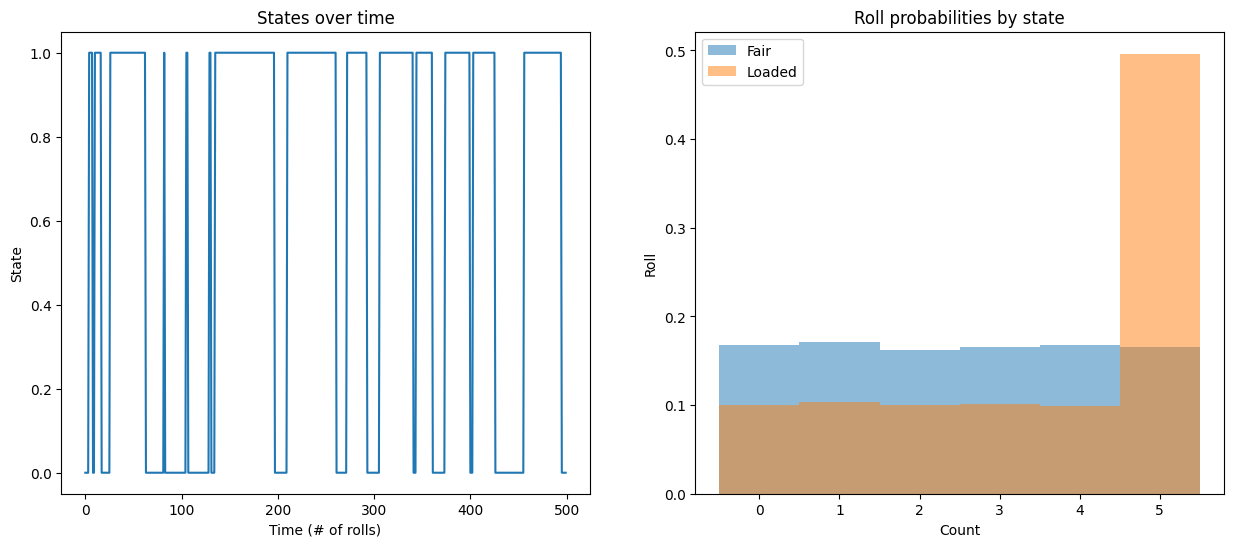

In [18]:
model = CategoricalHMM(n_components=2, random_state=0)

model.startprob_ = np.array([1.0, 0.0])

model.transmat_ = np.array([[0.95, 0.05],
                            [0.05, 0.95]])

model.emissionprob_ = np.array([[1/6,  1/6,  1/6,  1/6,  1/6,  1/6],
                                [1/10, 1/10, 1/10, 1/10, 1/10, 1/2]])

observations, states = model.sample(n_samples=30000)


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ax = axes[0]
ax.plot(states[:500])
ax.set_title('States over time')
ax.set_xlabel('Time (# of rolls)')
ax.set_ylabel('State')

ax = axes[1]
ax.hist(observations[states == 0], label='Fair',   alpha=0.5, bins=np.arange(7) - 0.5, density=True)
ax.hist(observations[states == 1], label='Loaded', alpha=0.5, bins=np.arange(7) - 0.5, density=True)
ax.set_title('Roll probabilities by state')
ax.set_xlabel('Count')
ax.set_ylabel('Roll')
ax.legend()

plt.show()

### 1.5. Train with longer sequence
#### 1.5.1. Naive approach

In [19]:
X_train = observations[:observations.shape[0] // 2]
X_val = observations[observations.shape[0] // 2:]

In [20]:
def print_model(model):
    print('Emission Probability')
    print(model.emissionprob_)
    print()
    print('Start Probability')
    print(model.startprob_)
    print()
    print('Transition Probability')
    print(model.transmat_)

In [21]:
model = CategoricalHMM(n_components=2, random_state=0)
model.fit(X_train)
print_model(model)

Emission Probability
[[0.15315351 0.13259791 0.11324777 0.15797253 0.11085077 0.33217751]
 [0.11306373 0.14988158 0.16496409 0.10404581 0.18033648 0.28770831]]

Start Probability
[0.00201523 0.99798477]

Transition Probability
[[0.50508697 0.49491303]
 [0.73854786 0.26145214]]


#### 1.5.2. Multiple trials

In [22]:
models, scores = [], []
for idx in tqdm(range(50)):
    model = CategoricalHMM(n_components=2, random_state=idx)
    model.fit(X_train)
    score = model.score(X_val)

    models.append(model)
    scores.append(score)

best_index = np.argmax(scores)
best_score = scores[best_index]
best_model = models[best_index]

100%|██████████| 50/50 [00:05<00:00,  9.03it/s]


In [23]:
print_model(best_model)

Emission Probability
[[0.09522516 0.0965084  0.10026835 0.1047648  0.10036351 0.50286978]
 [0.17068043 0.17409781 0.16109863 0.16169421 0.16955809 0.16287082]]

Start Probability
[0.00981422 0.99018578]

Transition Probability
[[0.93414204 0.06585796]
 [0.05293818 0.94706182]]


#### 1.5.3. Adding prior knowledge

In [24]:
models, scores = [], []
for idx in tqdm(range(50)):
    model = CategoricalHMM(n_components=2, random_state=idx, init_params='se')  # don't init transition
    model.transmat_ = np.array([np.random.dirichlet([0.95, 0.05]),
                                np.random.dirichlet([0.05, 0.95])])
    model.fit(X_train)
    score = model.score(X_val)

    models.append(model)
    scores.append(score)

best_index = np.argmax(scores)
best_score = scores[best_index]
best_model = models[best_index]

100%|██████████| 50/50 [00:04<00:00, 10.63it/s]


In [25]:
print_model(best_model)

Emission Probability
[[0.09697331 0.09968642 0.10116982 0.10596724 0.10250365 0.49369957]
 [0.16831403 0.17058862 0.15958669 0.15999961 0.16696948 0.17454158]]

Start Probability
[9.99980268e-01 1.97321591e-05]

Transition Probability
[[0.95331875 0.04668125]
 [0.03628612 0.96371388]]


#### 1.5.4. Decoding with trained model

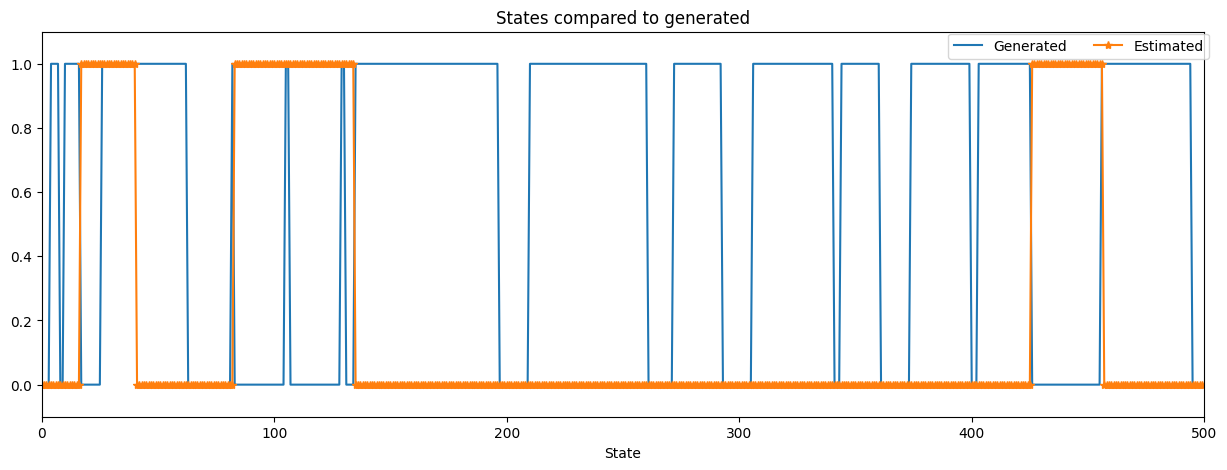

In [26]:
pred_states = best_model.predict(observations)

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(states[:500],      label='Generated')
ax.plot(pred_states[:500], marker='*', label='Estimated')

ax.set_xlim(0, 500)
ax.set_ylim(-0.1, 1.1)
ax.set_title('States compared to generated')
ax.set_xlabel('Time (# observations)')
ax.set_xlabel('State')
ax.legend(ncol=2, loc=[0.78, 0.93])
plt.show()

---
## 2. Earthquakes
### 2.1. Load data
#### 2.1.1. Load data

In [27]:
# earthquake data from http://earthquake.usgs.gov/
years = np.arange(1900, 2007)
earthquakes = np.array([
    13, 14, 8, 10, 16, 26, 32, 27, 18, 32, 36, 24, 22, 23, 22, 18,
    25, 21, 21, 14, 8, 11, 14, 23, 18, 17, 19, 20, 22, 19, 13, 26,
    13, 14, 22, 24, 21, 22, 26, 21, 23, 24, 27, 41, 31, 27, 35, 26,
    28, 36, 39, 21, 17, 22, 17, 19, 15, 34, 10, 15, 22, 18, 15, 20,
    15, 22, 19, 16, 30, 27, 29, 23, 20, 16, 21, 21, 25, 16, 18, 15,
    18, 14, 10, 15, 8, 15, 6, 11, 8, 7, 18, 16, 13, 12, 13, 20,
    15, 16, 12, 18, 15, 16, 13, 15, 16, 11, 11])

#### 2.1.2. Plot data

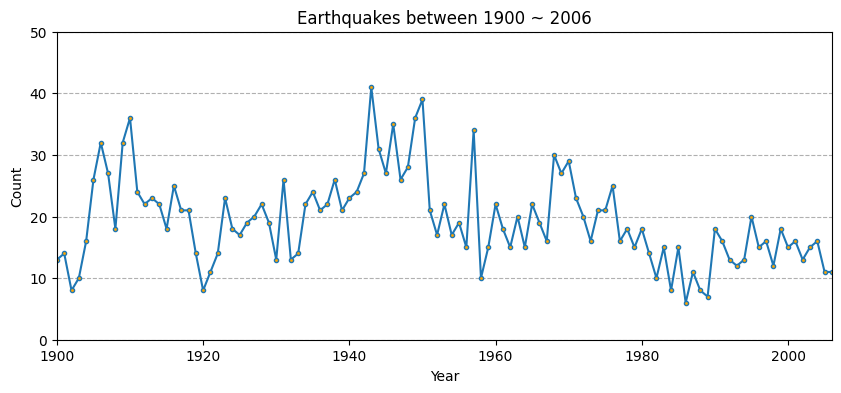

In [28]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(axis='y', linestyle='--')

ax.plot(years, earthquakes, marker='.', ms=6, mfc='orange')

ax.set_title('Earthquakes between 1900 ~ 2006')
ax.set_xlim(1900, 2006)
ax.set_ylim(0, 50)
ax.set_xlabel('Year')
ax.set_ylabel('Count')
fig.show()

### 2.2. Learning

In [29]:
models, scores = [], []
for n_components in tqdm(range(1, 5)):
    for idx in range(10):
        model = PoissonHMM(n_components=n_components, random_state=idx, n_iter=10)
        model.fit(earthquakes.reshape(-1, 1))
        score = model.score(earthquakes.reshape(-1, 1))

        models.append(model)
        scores.append(score)

best_index = np.argmax(scores)
best_score = scores[best_index]
best_model = models[best_index]

100%|██████████| 4/4 [00:00<00:00, 11.65it/s]


In [30]:
print(f'The best model had a score of {best_score} and {best_model.n_components} components')

The best model had a score of -328.02126544237626 and 4 components


In [31]:
best_model.lambdas_

array([[19.47437151],
       [26.02533786],
       [13.13011672],
       [32.44501927]])

In [32]:
best_model.transmat_

array([[9.13521667e-01, 4.47730145e-02, 3.82207594e-02, 3.48455957e-03],
       [1.10319521e-01, 6.27773385e-01, 2.85431871e-05, 2.61878551e-01],
       [2.29004970e-02, 3.31189734e-02, 9.43980240e-01, 2.89655740e-07],
       [2.16656183e-01, 1.90638581e-01, 1.43035741e-08, 5.92705222e-01]])

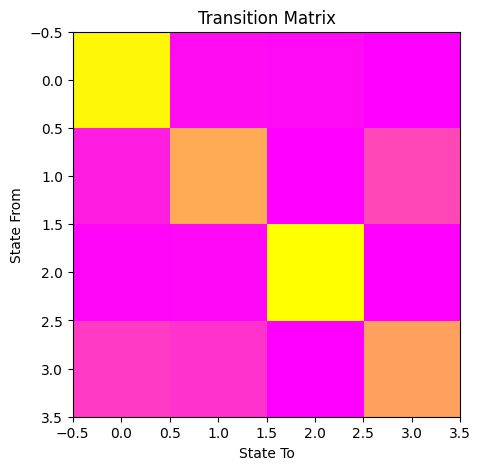

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.imshow(best_model.transmat_, aspect='auto', cmap='spring')

ax.set_title('Transition Matrix')
ax.set_xlabel('State To')
ax.set_ylabel('State From')
fig.show()

### 2.3. Estimating earthquakes

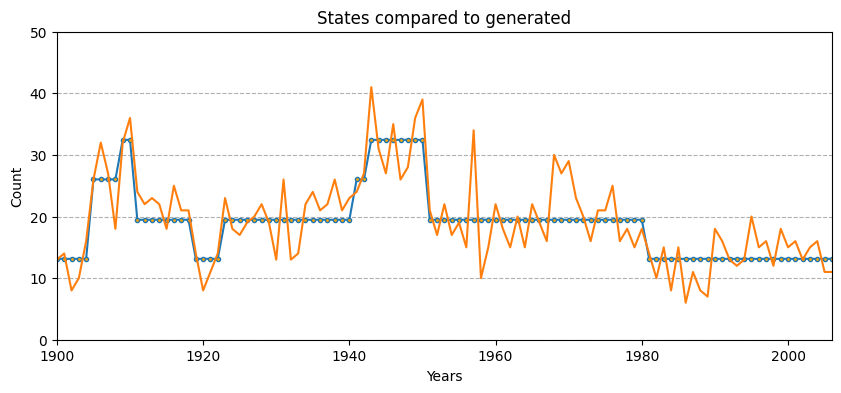

In [34]:
states = best_model.predict(earthquakes.reshape(-1, 1))
lambdas = best_model.lambdas_[states]

fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(axis='y', linestyle='--')

ax.plot(years, lambdas, marker='.', ms=6, mfc='orange')
ax.plot(years, earthquakes)

ax.set_title('States compared to generated')
ax.set_xlim(1900, 2006)
ax.set_ylim(0, 50)
ax.set_xlabel('Years')
ax.set_ylabel('Count')
fig.show()

---
## 3. HAR with HMM
### 3.1. Using Segments
#### 3.1.1. Load data

In [35]:
### Modify the data path to your own setting ###
X, Y = pickle.load(urllib.request.urlopen('https://github.com/snuhcs/ds11-time-series/raw/master/Data/HAR_segments_for_HMM.pkl'))
labels = sorted(list(set(Y)))

print(type(X), type(Y), len(X), len(Y))
print(type(X[0]), X[0].shape, labels)

<class 'list'> <class 'list'> 30 30
<class 'numpy.ndarray'> (3072, 3) ['running', 'standing', 'walking']


#### 3.1.2. Plot data

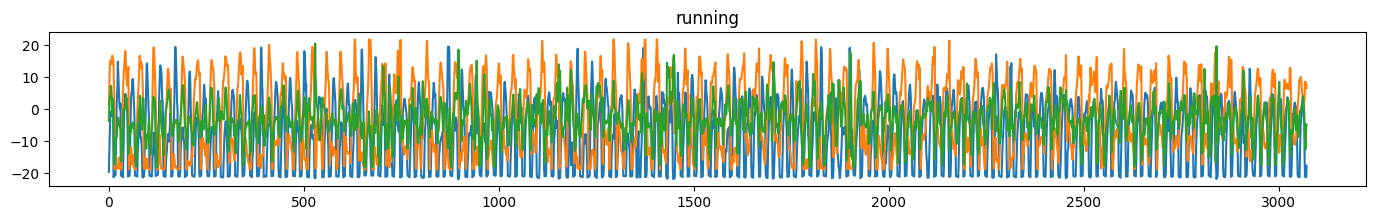

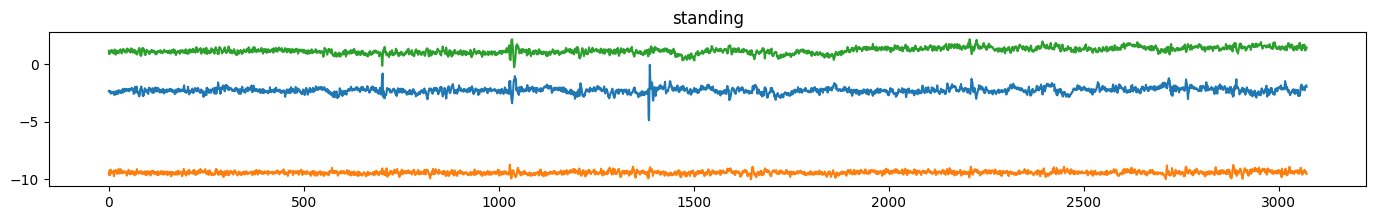

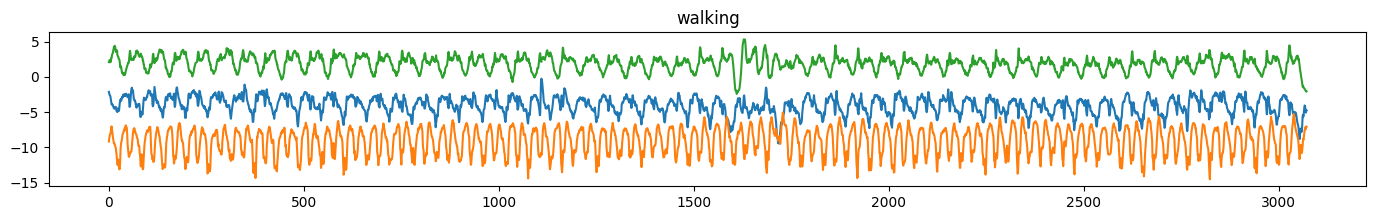

In [36]:
plt.rcParams['figure.figsize'] = (17, 2)

plt.title(Y[0])
plt.plot(X[0])
plt.show()

plt.title(Y[10])
plt.plot(X[10])
plt.show()

plt.title(Y[20])
plt.plot(X[20])
plt.show()

#### 3.1.3. Train Model

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=0)
print(len(X_train), len(X_test))

21 9


In [38]:
# Make HMM models per motion classes
hmm_dict = {
    label: GaussianHMM(n_components=5, n_iter=30, random_state=0)
    for label in labels
}

# Process training data
X_train_dict = defaultdict(list)
for segment, label in zip(X_train, Y_train):
    X_train_dict[label].append(segment)

# Fit HMM labels with each label data
for label in labels:
    segments = X_train_dict[label]
    hmm_dict[label].fit(
        np.vstack(segments),
        [len(segment) for segment in segments]
    )

#### 3.1.5. Test Model

In [39]:
def predict_sample(X):
    '''
    Evaluate with multiple HMMs (HMM model for each label)
    Choose most likely label
    '''
    probs = {
        label: hmm.score(X)
        for label, hmm in hmm_dict.items()
    }
    return max(probs, key=probs.get)

def predict(Xs):
    return [predict_sample(X) for X in Xs]
    
Y_pred = predict(X_test)
Y_true = Y_test

              precision    recall  f1-score   support

     running       1.00      1.00      1.00         3
    standing       1.00      0.33      0.50         3
     walking       0.60      1.00      0.75         3

    accuracy                           0.78         9
   macro avg       0.87      0.78      0.75         9
weighted avg       0.87      0.78      0.75         9



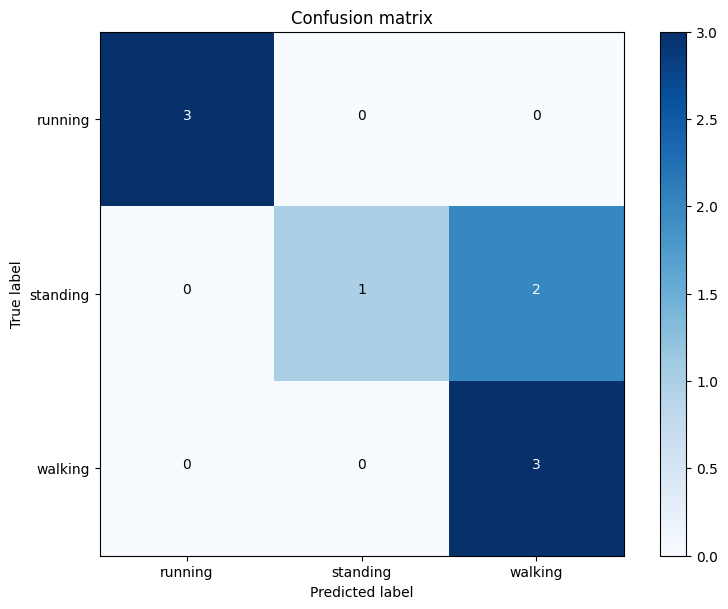

In [40]:
print(classification_report(Y_true, Y_pred))
plot_confusion_matrix(Y_true, Y_pred, target_names=labels)

### 3.2. Using Sliding Window
#### 3.2.1. Load data

In [41]:
### Modify the data path to your own setting ###
X_segments, Y_segments = pickle.load(urllib.request.urlopen('https://github.com/snuhcs/ds11-time-series/raw/master/Data/HAR_segments_for_HMM.pkl'))
labels = sorted(list(set(Y_segments)))

print(type(X_segments), type(Y_segments), len(X_segments), len(Y_segments))
print(type(X_segments[0]), X_segments[0].shape, labels)

<class 'list'> <class 'list'> 30 30
<class 'numpy.ndarray'> (3072, 3) ['running', 'standing', 'walking']


#### 3.2.2. Apply sliding window

In [42]:
def sliding_window(X_segment, window_size, stride):
    X_windows = []
    for sidx in range(0, X_segment.shape[0], stride):
        if sidx + window_size <= X_segment.shape[0]:
            X_windows.append(X_segment[sidx:sidx+window_size])
    return X_windows


def segments_to_windows(X_segments, Y_segments, window_size=150, stride=50):
    X_windows, Y_windows = [], []
    for X_segment, Y_segment in zip(X_segments, Y_segments):
        X_windows_in_segment = sliding_window(X_segment, window_size, stride)
        X_windows += X_windows_in_segment
        Y_windows += [Y_segment] * len(X_windows_in_segment)
    return X_windows, Y_windows

In [43]:
X, Y = segments_to_windows(X_segments, Y_segments, window_size=150, stride=50)

print(type(X), type(Y), len(X), len(Y))
print(type(X[0]), X[0].shape, labels)

<class 'list'> <class 'list'> 1770 1770
<class 'numpy.ndarray'> (150, 3) ['running', 'standing', 'walking']


#### 3.2.3. Plot data

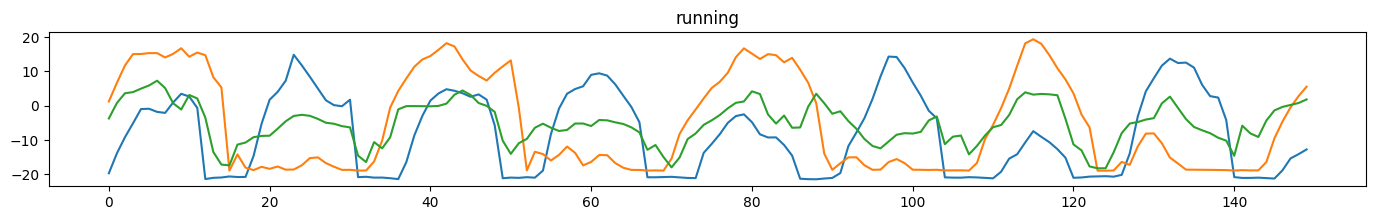

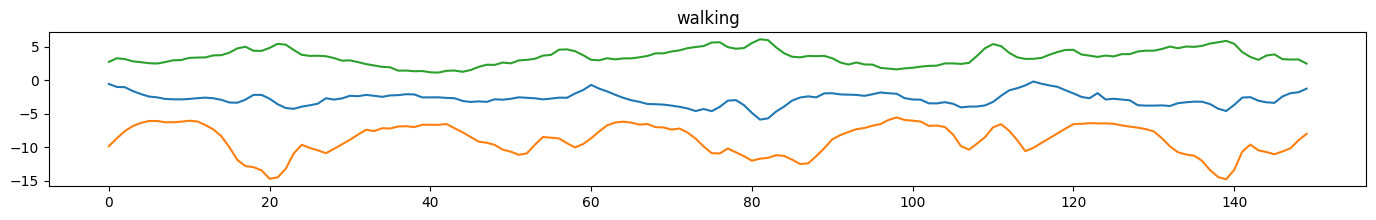

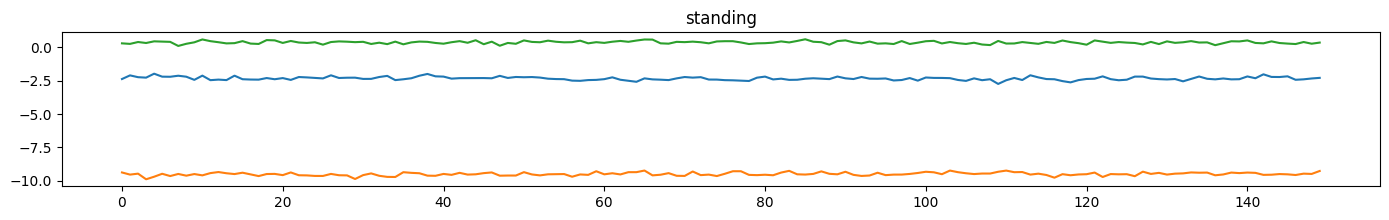

In [44]:
plt.rcParams['figure.figsize'] = (17, 2)

plt.title(Y[0])
plt.plot(X[0])
plt.show()

plt.title(Y[500])
plt.plot(X[500])
plt.show()

plt.title(Y[1000])
plt.plot(X[1000])
plt.show()

#### 3.2.4. Train Model
To fit with multiple observations, hmmlearn provides `hmm.fit(X_concat, lengths)`

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=False)
print(len(X_train), len(X_test))

1327 443


In [46]:
# Make HMM models per motion classes
hmm_dict = {
    label: GaussianHMM(n_components=5, n_iter=30, random_state=0)
    for label in labels
}

# Process training data
X_train_dict = defaultdict(list)
for window, label in zip(X_train, Y_train):
    X_train_dict[label].append(window)

# Fit HMM labels with each label data
for label in labels:
    windows = X_train_dict[label]
    hmm_dict[label].fit(
        np.vstack(windows),
        [len(window) for window in windows]
    )

#### 3.2.5. Test Model

In [47]:
Y_pred = predict(X_test)
Y_true = Y_test

              precision    recall  f1-score   support

     running       1.00      1.00      1.00       118
    standing       1.00      1.00      1.00       148
     walking       1.00      1.00      1.00       177

    accuracy                           1.00       443
   macro avg       1.00      1.00      1.00       443
weighted avg       1.00      1.00      1.00       443



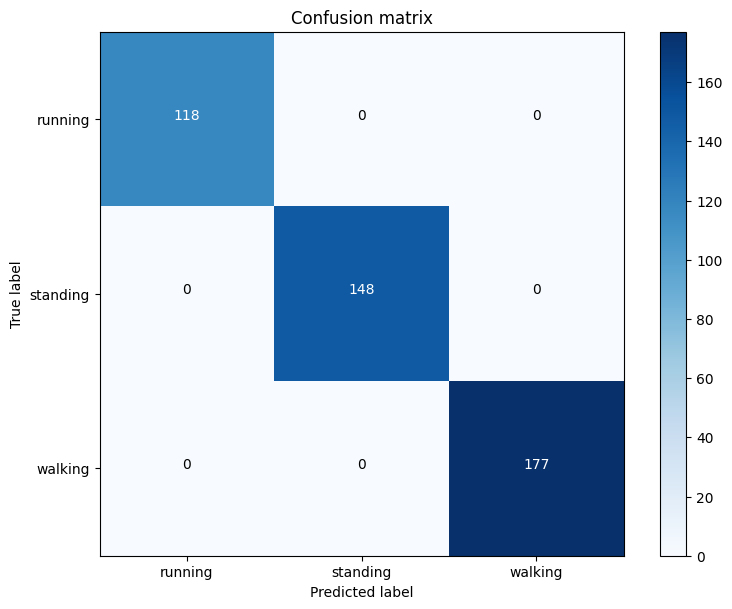

In [48]:
print(classification_report(Y_true, Y_pred))
plot_confusion_matrix(Y_true, Y_pred, target_names=labels)